## Курсовая работа

Загрузить файл hr.csv
2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
3. Рассчитать и визуализировать корреляционную матрицу для переменных
4. Визуализировать несколько взаимосвязей между переменными
5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными
6. Рассчитать сколько работников работает в каждом департаменте
7. Показать распределение сотрудников по зарплатам
8. Показать распределение сотрудников по зарплатам совместно с департаментами
9. Сколько сотрудников покинули компанию
10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию
11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix

import numpy as np

from numpy import linspace,hstack

import matplotlib
import matplotlib.pyplot as plt


from pylab import plot,show,hist, rcParams 
rcParams['figure.figsize'] = 8, 5


from scipy import stats
from scipy.stats import kurtosis, skew, mode
from scipy.stats.kde import gaussian_kde
from scipy.optimize import curve_fit


import seaborn as sns
from emoji import emojize

#графики в svg выглядят лучше базовых
%config InlineBackend.figure_format = 'svg' 


### 0. Загрузить файл hr.csv

Загрузим данные из файла и посмотрим что за тип данных, каие признаки и переменные у нас есть и их количество

In [2]:
df_HR = pd.read_csv('HR.csv', sep=',', header = 0, index_col=False)

In [3]:
#посмотрим первые 5 строчек нашего dataFrame
df_HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
#посмотрим какое кол-во строк и столбцов в нашем dataFrame
print(df_HR.shape)

(14999, 10)


In [5]:
#посмотрим какие есть признаки в нашем dataFrame
print(df_HR.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')


In [6]:
#посмотрим на тип данных в нашем dataFrame
df_HR.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [7]:
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB



### 1. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

Для выполнения данного пункта используем два подхода. Первый использует метод describe и для некоторых статистик используем методы mean, median, min/max, mode и std

##### Описательные статистики с использованием метода describe

In [8]:
df_HR.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


##### Описательные статистики с использованием методов mean, median, min/max, mode и std

In [68]:
#находим минимальное значение по каждому признаку
df_HR.min()

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
sales                      IT
salary                   high
dtype: object

In [69]:
#находим максимальное значение по каждому признаку
df_HR.max()

satisfaction_level               1
last_evaluation                  1
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
sales                    technical
salary                      medium
dtype: object

In [70]:
#находим среднее арифметическое значение по каждому признаку
df_HR.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [12]:
#находим медианное значение для каждого признака
df_HR.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [13]:
#находим модальное значение для каждого признака
df_HR.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#находим стандартное отклонение для каждого признака
df_HR.std()

satisfaction_level        0.248631
last_evaluation           0.171169
number_project            1.232592
average_montly_hours     49.943099
time_spend_company        1.460136
Work_accident             0.351719
left                      0.425924
promotion_last_5years     0.144281
dtype: float64

In [15]:
#копнем глубже и посмотрим гистограмму
#df_HR['average_montly_hours'].plot.hist(alpha=0.6)
#plt.xlabel('average_montly_hours')

### 2. Рассчитать и визуализировать корреляционную матрицу для переменных
Для выполнения данного пункта используем метод corr для расчета корреляционных связей и использую магию seaborn 
строим корреляционную матрицу

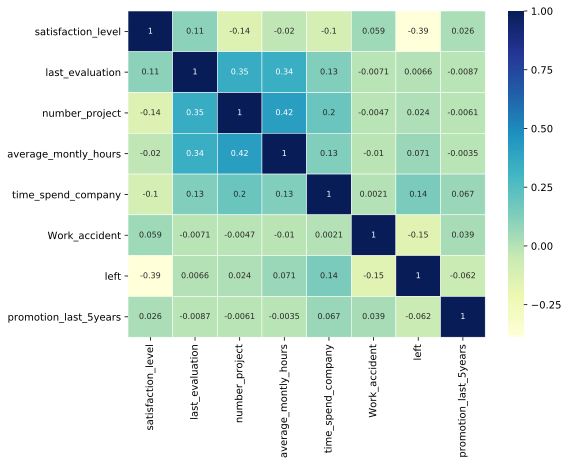

In [16]:
fig, ax = plt.subplots()
#protect our eyes возьмем размер побольше
fig.set_size_inches(8, 6)
corr = df_HR.corr()
sns.heatmap(corr, annot=True, linewidths=.5,cmap="YlGnBu", linecolor='white', annot_kws={"size": 8},\
            xticklabels=corr.columns.values, yticklabels=corr.columns.values)

### 3. Визуализировать несколько взаимосвязей между переменными
Для выполнения данного пункта задания из генеральной совокупности мы выделим выборку из 200 наблюдений (по 150 на разных интервалах генеральной совокупности (интервал 0-150, 10000 - 10150)


### 3.1.  Посмотрим взаимосвязей между last_evaluation и satisfaction_level

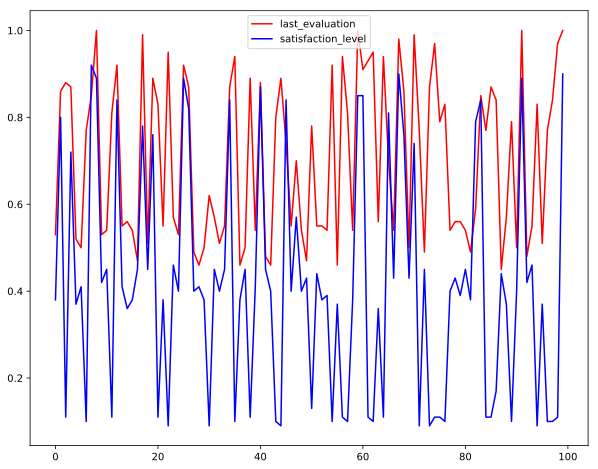

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

plt.plot(df_HR['last_evaluation'][0:100], 'r')
plt.plot(df_HR['satisfaction_level'][0:100], 'b')
plt.legend()

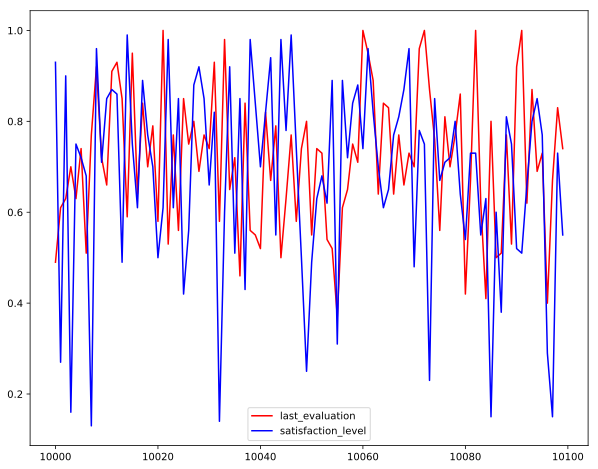

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

plt.plot(df_HR['last_evaluation'][10000:10100], 'r')
plt.plot(df_HR['satisfaction_level'][10000:10100], 'b')
plt.legend()

Мы можем наблюдать очень интересную зависимость, так сказать, обратную корреляцияю между последней аттестацией (last_evaluation) и уровнем удовлетворенности (satisfaction_level). Видимо, чем реже сотрудника аттестовывают, тем меньше его уровень удовлетворенности. Отлично (не для сотрудника, конечно), но у нас уже есть одна фича

### 3.2.  Посмотрим взаимосвязей между last_evaluation и number_project

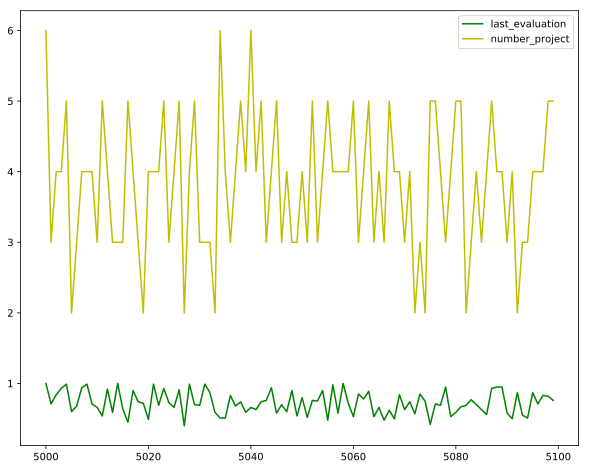

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

plt.plot(df_HR['last_evaluation'][5000:5100], 'g')
plt.plot(df_HR['number_project'][5000:5100], 'y')
plt.legend()

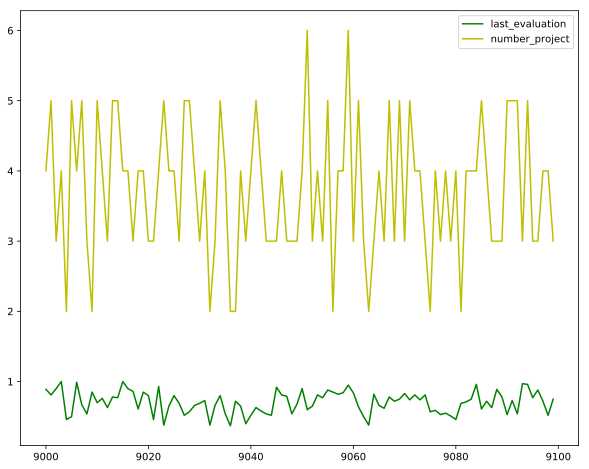

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

plt.plot(df_HR['last_evaluation'][9000:9100], 'g')
plt.plot(df_HR['number_project'][9000:9100], 'y')
plt.legend()


### 3.3.  Посмотрим взаимосвязей между number_project и average_montly_hours

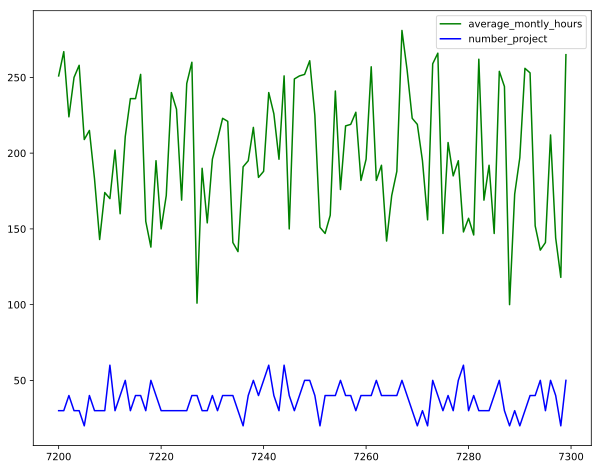

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

plt.plot(df_HR['average_montly_hours'][7200:7300], 'g')
plt.plot(df_HR['number_project'][7200:7300]*10, 'b') #масштабирую, домножая значения number_project на 10
plt.legend()

### 4. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

будем считать что если pvalue <= 0.05, то этого достаточно чтобы отвергнуть нулевую гипотезу, а если pvalue > то у нас недостаточно оснований для того, чтобы отвергнуть нулевую гипотезу

##### 4.1 Проверим гипотизу что ср знач количества проектов (number_project) двух выборок из разных интервалов генеральной совокупности равны 

- H0 = ср знач количества проектов (number_project) двух выборок из разных интервалов генеральной совокупности равны
- H1 = ср знач количества проектов (number_project) двух выборок из разных интервалов генеральной совокупности не равны

Значение pvalue=0.13877713534251673 значит у нас недостаточно оснований отвергнуть нулевую гипотезу

In [71]:
stats.ttest_ind(df_HR['number_project'][0:2500], df_HR['number_project'][2500:5000])

Ttest_indResult(statistic=1.4805965969113042, pvalue=0.13877713534251673)

##### 4.2 Проверим гипотизу что ср знач количества отработанных часов в месяц (average_montly_hours)  у работников IT и support равны

- H0 = ср знач average_montly_hours одинаковы по значению
- H1 = ср знач average_montly_hours различны по значению

Значение pvalue=0.4145924018910595 очень высокое, значит у нас недостаточно оснований отвергнуть нулевую гипотезу


In [23]:
sales_IT = df_HR[df_HR['sales'] == 'IT']['average_montly_hours']
sales_support = df_HR[df_HR['sales'] == 'support']['average_montly_hours']

stats.ttest_ind(sales_IT, sales_support) 

Ttest_indResult(statistic=0.8159370545064447, pvalue=0.4145924018910595)

In [24]:
#проверим нет ли здесь ошибки второго рода, нет все верно (значения IT - 202.2 а значения support - 200.7)
df_HR.groupby('sales').mean().reset_index()[['sales','average_montly_hours']]

,sales,average_montly_hours
0,IT,202.215974
1,RandD,200.800508
2,accounting,201.162973
3,hr,198.684709
4,management,201.249206
5,marketing,199.385781
6,product_mng,199.965632
7,sales,200.911353
8,support,200.758188
9,technical,202.497426


##### 4.3 Проверим гипотизу что ср знач уровня удовлетворенности работников (satisfaction_level)  у product_mng и  бухгалтеров равны

- H0 = ср знач satisfaction_level у менеджеров проектов и бухгалтеров одинаковы по значению
- H1 = ср знач satisfaction_level у менеджеров проектов и бухгалтеров различны по значению

Значение pvalue=0.00215157997439044 низкое, значит у нас достаточно оснований для того чтобы отвергнуть нулевую гипотезу



In [25]:
sales_IT = df_HR[df_HR['sales'] == 'product_mng']['satisfaction_level']
sales_support = df_HR[df_HR['sales'] == 'accounting']['satisfaction_level']

stats.ttest_ind(sales_IT, sales_support) 

Ttest_indResult(statistic=3.073269772057958, pvalue=0.00215157997439044)

In [26]:
#проверим нет ли здесь ошибки первого рода? нет, все верно (product_mng - 0.61 а accounting - 0.58)
df_HR.groupby('sales').mean().reset_index()[['sales','satisfaction_level']]

,sales,satisfaction_level
0,IT,0.618142
1,RandD,0.619822
2,accounting,0.582151
3,hr,0.598809
4,management,0.621349
5,marketing,0.618601
6,product_mng,0.619634
7,sales,0.614447
8,support,0.618300
9,technical,0.607897


### 5. Рассчитать сколько работников работает в каждом департаменте

In [29]:
df_HR['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

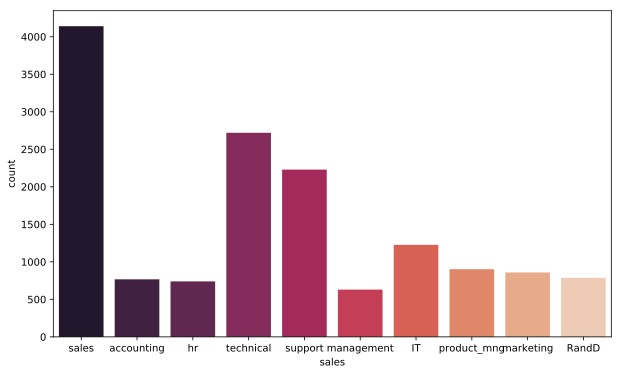

In [30]:
fig, ax = plt.subplots()
#protect our eyes возьмем размер побольше
fig.set_size_inches(10, 6)

sns.countplot(df_HR['sales'], palette= 'rocket')

### 6.Показать распределение сотрудников по зарплатам

In [31]:
df_HR['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

Text(0,0.5,'employees')

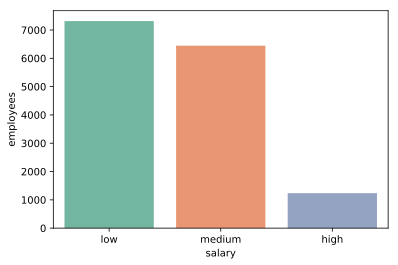

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
sns.countplot(df_HR['salary'], palette="Set2")
plt.ylabel('employees')

### 7. Показать распределение сотрудников по зарплатам совместно с департаментами

In [33]:
df_HR.groupby(['sales', 'salary']).count()['satisfaction_level']

sales        salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: satisfaction_level, dtype: int64

### 8. Сколько сотрудников покинули компанию

In [34]:
#уволилось 3571 сотрудник
df_HR['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

### 9. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

##### создадим новый дата фрейм left_stuff, в котором будут только уволившиеся сотрудники, и current_stuff, в котором будут работники, которые еще не успели уволиться

In [35]:
left_stuff = df_HR[df_HR['left'] == 1]
current_stuff = df_HR[df_HR['left'] == 0]

##### наибольшее количество сотрудников в абсолютном выражении уволилось из департамента продаж (sales)

In [36]:
left_stuff['sales'].value_counts()

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: sales, dtype: int64

##### посмотрим распределение уволившихся сотрудников по департаментам (в относительных величинах)
если анализировать относительные значения то самая большая доля уволившихся приходится на hr и accounting, можно сделать вывод, что-то не так в этих департаментах 

In [37]:
(left_stuff['sales'].value_counts()/(left_stuff['sales'].value_counts()+df_HR['sales'].value_counts()))*100

IT             18.200000
RandD          13.325991
accounting     21.009269
hr             22.536688
management     12.621359
marketing      19.132893
product_mng    18.000000
sales          19.674040
support        19.935345
technical      20.398010
Name: sales, dtype: float64

##### посмотрим с большим приближением на уволившихся работников из департамента hr, сравним с показателями еще не уволившихся сотрудников и сделаем предположение о возможности увольнения сотрудников в ближайшее время
создадим отдельный дата фрейм для уволившився кадровых специалистов left_hr_stuff и для еще не уволившихся current_hr_stuff

In [38]:
left_hr_stuff = left_stuff[left_stuff['sales'] == 'hr']
current_hr_stuff = current_stuff[current_stuff['sales'] == 'hr']

In [39]:
left_hr_stuff.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
31,0.45,0.57,2,134,3,0,1,0,hr,low
32,0.40,0.51,2,145,3,0,1,0,hr,low
33,0.45,0.55,2,140,3,0,1,0,hr,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
108,0.71,0.87,3,177,4,0,1,0,hr,medium


##### сравним среднии показатели для уволившихся и не уволившихся
мы видим интересные значения, 75% уволившихся сотрудников имели уровень удовлетворенности работой порядка 53%, что существенно ниже чем у такого же количества работающих сотрудников

In [40]:
left_hr_stuff['satisfaction_level'].describe()

count    215.000000
mean       0.433395
std        0.243090
min        0.090000
25%        0.360000
50%        0.420000
75%        0.530000
max        0.910000
Name: satisfaction_level, dtype: float64

In [41]:
current_hr_stuff['satisfaction_level'].describe()

count    524.000000
mean       0.666679
std        0.216091
min        0.130000
25%        0.530000
50%        0.670000
75%        0.840000
max        1.000000
Name: satisfaction_level, dtype: float64

##### Проверим гипотезу, что ср знач уровня удовлетворенности (satisfaction_level)  у уволившихся работников hr и не уволившихся равны

- H0 = ср знач satisfaction_level у работающих и уволившихся сотрудников одинаковы по значению
- H1 = ср знач satisfaction_level у работающих и уволившихся сотрудников различны по значению

Значение pvalue=3.237464051973426e-34 очень маленькое, значит у нас достаточно оснований отвергнуть нулевую гипотезу

А это значит, что мы можем предположить, что при уровне удовлетворения у сотрудников отдела кадров равном 0.53 и ниже есть высокая вероятность того, что эти сотрудники в ближайшее время могут уволится, если обратить внимание на значение первого квартиля в current_hr_stuff то можно предположить что скоро могут уволиться четверть сотрудников департамента hr

In [44]:
stats.ttest_ind(left_hr_stuff['satisfaction_level'], current_hr_stuff['satisfaction_level'])

Ttest_indResult(statistic=-12.843550850814777, pvalue=3.237464051973426e-34)

##### посмотрим в каком количестве проектов принимали участие уволившиеся и не уволившиеся сотрудники

In [57]:
#основная часть уволившихся сотрудников принимала часть в 2 проектах
left_hr_stuff['number_project'].value_counts()

2    109
6     33
4     32
5     21
7     13
3      7
Name: number_project, dtype: int64

In [58]:
#интересная картина с неуволившимися, мы можем видить как увеличилась нагрузка на сотрудников
current_hr_stuff['number_project'].value_counts()

3    209
4    190
5     73
2     31
6     21
Name: number_project, dtype: int64

##### посмотрим сколько лет работали в компании уволившиеся сотрудники

In [64]:
#мы видим что наиболее часто увольняются сотрудники hr которые работали от 3 до 4 лет
left_hr_stuff['time_spend_company'].value_counts(ascending=True)

6     13
5     36
4     51
3    115
Name: time_spend_company, dtype: int64

##### посмотрим распределение зарплат по уволившимся сотрудникам

In [50]:
left_hr_stuff['salary'].value_counts()

medium    117
low        92
high        6
Name: salary, dtype: int64

##### посмотрим распределение признака "повышение" за последнии 5 лет (promotion_last_5years), уволившихся и не уволившихся сотрудников по всем департаментам

In [62]:
pd.crosstab(left_stuff['promotion_last_5years'], left_stuff['sales'], margins= True)

sales,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,All
promotion_last_5years,,,,,,,,,,,
0,270,121,204,215,88,203,198,1007,552,694,3552
1,3,0,0,0,3,0,0,7,3,3,19
All,273,121,204,215,91,203,198,1014,555,697,3571


In [58]:
pd.crosstab(current_stuff['promotion_last_5years'], current_stuff['sales'], margins= True)

sales,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,All
promotion_last_5years,,,,,,,,,,,
0,954,639,549,509,473,612,704,3033,1657,1998,11128
1,0,27,14,15,66,43,0,93,17,25,300
All,954,666,563,524,539,655,704,3126,1674,2023,11428


##### Проверим гипотезу, что ср знач количества отработанных часов в месяц (average_montly_hours) у уволившихся и не уволившихся работников равны
- H0 = ср знач average_montly_hours у работающих и уволившихся сотрудников одинаковы по значению
- H1 = ср знач average_montly_hours у работающих и уволившихся сотрудников различны по значению

Значение pvalue=0.6341633620874574 значение больше 0.05, это значит у нас не достаточно оснований отвергнуть нулевую гипотезу


In [67]:
stats.ttest_ind(left_hr_stuff['average_montly_hours'], current_hr_stuff['average_montly_hours'])

Ttest_indResult(statistic=-0.47607314182206906, pvalue=0.6341633620874574)

#####  Общии выводы
на основании полученных результатов мы можем предпологать что основной причиной увольнения сотрудников является отсутствие мотивации, низкий показатель satisfaction_level, причин этому может быть несколько, наиболее вероятная это отсутствие карьерного роста, при этом высокая загрузку average_montly_hours